In [1]:
data_path = '/Users/apple/Desktop/Machine_Learning/project/Audio/data_audi/data_prepared'

In [2]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
import pandas as pd
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
from sklearn import cross_validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split


/Users/apple/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%matplotlib inline

In [4]:
data_sample = pd.read_csv(data_path+'/sample.csv', sep = '\t')

In [5]:
data_sample.columns

Index(['name', 'vowel', 'stress', 'pre_word', 'word', 'fol_word', 'F1', 'F2',
       'F3', 'B1', 'B2', 'B3', 't', 'beg', 'end', 'dur', 'plt_vclass',
       'plt_manner', 'plt_place', 'plt_voice', 'plt_preseg', 'plt_folseq',
       'style', 'glide', 'pre_seg', 'fol_seg', 'context', 'vowel_index',
       'pre_word_trans', 'word_trans', 'fol_word_trans', 'F1@20%', 'F2@20%',
       'F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%',
       'F2@80%', 'nFormants'],
      dtype='object')

In [8]:
len(data)

3132529

In [10]:
data[['F1','F2']].unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

# Analysis by words

In [4]:
data = pd.read_csv(data_path+'/sample_selected.csv',index_col = 0)

In [20]:
data_merged = data
by_vowel = data_merged.groupby(['name'])['word'].count()

In [21]:
by_vowel

name
ADAMBWOLF                   2786
AHUGOBLANKINGSHIP           3256
ALANBMORRISON               7998
ALANEDWARDUNTEREINER        1440
ALANGURA                    2504
ALANMFREEDMAN               3314
ALEXANDERFREICHERT          3088
ALLENLICHTENSTEIN           3302
ALLISONMZIEVE               2539
AMYHOWE                     5550
AMYZAPP                     2677
ANDREWJPINCUS              26351
ANDREWJROSSMAN              2145
ANDREWLFREY                 8504
ANDREWSTUARTBIRRELL         2170
ANTHONYAYANG               18775
ARTHURFFERGENSON            2759
ARTHURHBRYANT               2762
ARTHURRMILLER               3380
BARBARABMCDOWELL           12994
BARBARADUNDERWOOD          13075
BARRYROSTRAGER              3813
BENJAMINCMIZER             12468
BERICRESTUCCIA              2873
BERTHDEIXLER                3324
BERTWREIN                     91
BETHSBRINKMANN             21586
BRADLEYSPHILLIPS            3431
BRIANFBAROV                 4440
BRIANPLAUTEN                2784
     

In [14]:
by_word = pd.DataFrame(data_merged.groupby(['name','word'])['fol_word'].nunique())

In [15]:
by_word['name'] = list(by_word.index.get_level_values('name'))

In [17]:
by_word = by_word.groupby(['name'])['fol_word'].sum()

In [37]:
By_speaker = pd.DataFrame([by_word,by_vowel]).T

In [53]:
By_speaker = By_speaker.rename(columns={'word':'vowel','fol_word':'word'})

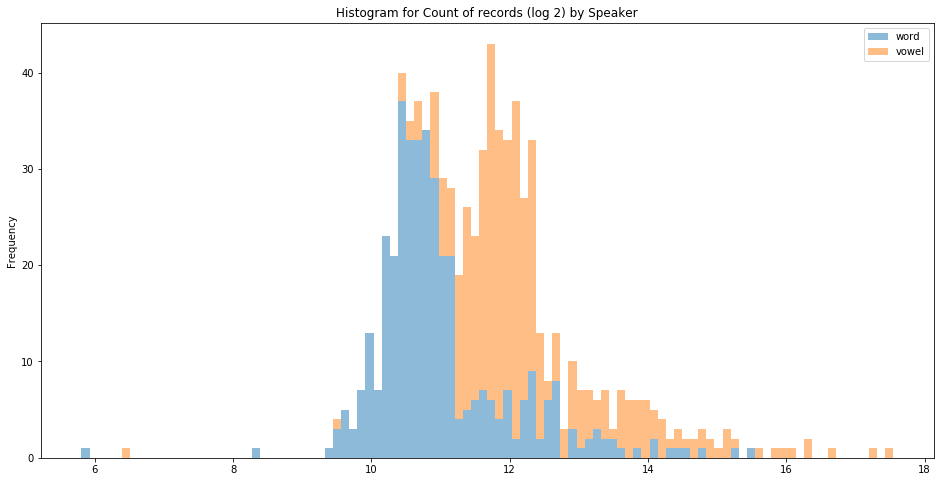

In [58]:
np.log2(By_speaker).plot.hist(stacked=True, bins=100,alpha = 0.5,figsize = (16,8))
plt.title('Histogram for Count of records (log 2) by Speaker')

In [59]:
word_freq = data_merged.groupby(['word'])['word'].count()
#word_freq[word_freq>2000].describe()
#word_freq[word_freq>2000].hist()

In [60]:
word_freq.describe()

count     24209.000000
mean        129.395101
std        1501.856421
min           1.000000
25%           3.000000
50%           8.000000
75%          32.000000
max      151130.000000
Name: word, dtype: float64

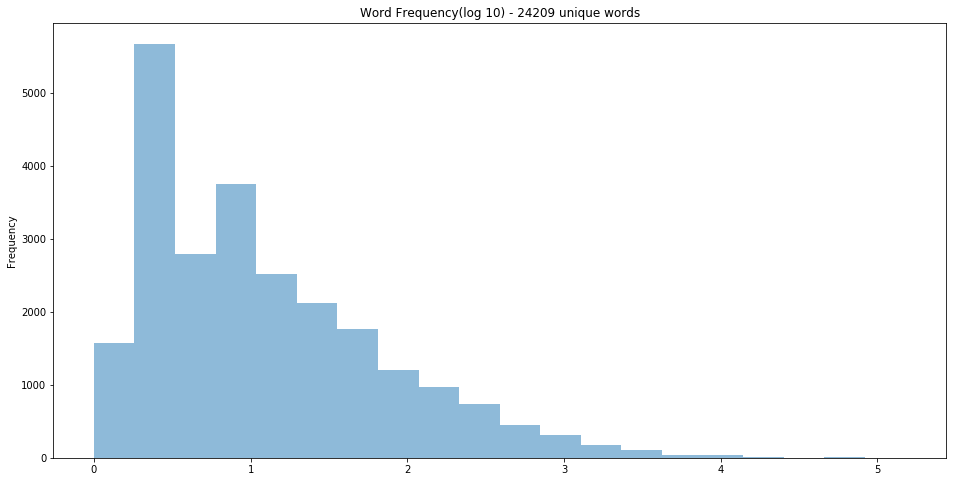

In [64]:
np.log10(word_freq).plot.hist( bins=20,alpha = 0.5,figsize = (16,8))
plt.title('Word Frequency(log 10) - 24209 unique words')

In [42]:
list(word_freq[word_freq>2000].index)

['A',
 'ABOUT',
 'ABSOLUTELY',
 'ACT',
 'ACTION',
 'ACTUALLY',
 'ADMINISTRATIVE',
 'AFTER',
 'AGAIN',
 'AGAINST',
 'AGENCY',
 'ALL',
 'ALSO',
 'AMENDMENT',
 'AN',
 'ANALYSIS',
 'AND',
 'ANOTHER',
 'ANSWER',
 'ANY',
 'ANYTHING',
 'APPLICATION',
 'APPLY',
 'APPROPRIATE',
 'ARE',
 'ARGUMENT',
 'AS',
 'AT',
 'AUTHORITY',
 'AVAILABLE',
 'BASIS',
 'BE',
 'BECAUSE',
 'BEEN',
 'BEFORE',
 'BEING',
 'BELIEVE',
 'BETWEEN',
 'BUT',
 'BY',
 'CALIFORNIA',
 'CAN',
 'CASE',
 'CASES',
 'CERTAINLY',
 'CIRCUIT',
 'CIRCUMSTANCES',
 'CLAIM',
 'CONGRESS',
 'CONSTITUTIONAL',
 'CONTEXT',
 'CORRECT',
 'COULD',
 'COURT',
 'CRIMINAL',
 'DECIDED',
 'DECISION',
 'DEFENDANT',
 'DEFINITION',
 'DETERMINATION',
 'DID',
 "DIDN'T",
 'DIFFERENT',
 'DISCRIMINATION',
 'DISTRICT',
 'DO',
 'DOES',
 "DOESN'T",
 "DON'T",
 'EIGHTY',
 'EVEN',
 'EVERY',
 'EVIDENCE',
 'EXACTLY',
 'EXAMPLE',
 'FACT',
 'FEDERAL',
 'FIFTY',
 'FIRST',
 'FIVE',
 'FOR',
 'FOUR',
 'FROM',
 'GENERAL',
 'GET',
 'GO',
 'GOING',
 'GOVERNMENT',
 'HAD',
 'HAS'

In [18]:
word_speaker_times = data.groupby(['word','name','vowel'])['vowel'].count()
word_speaker_times = pd.DataFrame(word_speaker_times)
word_speaker_times['word'] = list(word_speaker_times.index.get_level_values('word'))
word_speaker_times['name'] = list(word_speaker_times.index.get_level_values('name'))

In [19]:
# The minimum times a vowel in one word spoken by a speaker represent how many times the word has been spoken  
word_speaker_realtimes = word_speaker_times.groupby(['word','name'])['vowel'].min()

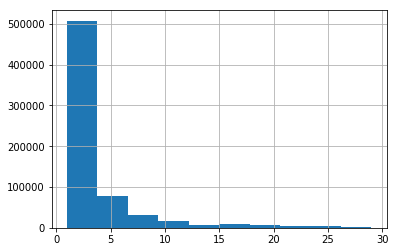

In [20]:
word_speaker_realtimes[word_speaker_realtimes<30].hist(bins=10)

In [21]:
word_speaker_realtimes.describe()

count    687590.000000
mean          6.305871
std          51.654582
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max        9965.000000
Name: vowel, dtype: float64

In [22]:
data_sample['word'].nunique()

34932

In [23]:
word_speaker_vowel_count = data_sample.groupby(['word','name'])['vowel'].nunique()
word_speaker_vowel_count.describe()

count    687590.000000
mean          1.954912
std           0.857671
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          10.000000
Name: vowel, dtype: float64

In [ ]:
word_speaker_vowel_count

In [ ]:
word_speaker_vowel = data_sample.groupby(['word','name'])['vowel'].unique()
word_speaker_vowel = pd.DataFrame( word_speaker_vowel)
word_speaker_vowel.describe()

In [ ]:
word_speaker_vowel['word'] = list(word_speaker_vowel.index.get_level_values('word'))
word_speaker_vowel['vowel_string'] = list(map(lambda x:''.join(x), word_speaker_vowel['vowel']))
word_speaker_vowel['word_len'] = list(map(lambda x:len(x), word_speaker_vowel['vowel']))

In [ ]:
word_speaker_vowel['word_len'].hist()

In [ ]:
unique_count = word_speaker_vowel.groupby(['word'])['vowel_string'].nunique()

In [ ]:
sum(unique_count>1)

# Label Adding

In [3]:
donation_path = '/Users/apple/Desktop/Machine_Learning/project/Audio/data_audi/speakers/all_speakers.csv'
donation_speaker = pd.read_csv(donation_path)

In [4]:
donation_speaker

,Speaker,Democratic,Republican
0,JOHN P. ELWOOD,1.0,19.0
1,ROY G. DAVIS,2.0,1.0
2,DONALD J. RAMSELL,NaN,NaN
3,E. JOHN BLANCHARD,8.0,6.0
4,PAUL J. ORFANEDES,NaN,NaN
5,JILL M. WICHLENS,NaN,NaN
6,WALTER HELLERSTEIN,NaN,NaN
7,PRATIK A. SHAH,NaN,NaN
8,CHRISTOPHER S. BRASHER,NaN,NaN
9,MAURICIO A. FLORES,NaN,NaN


In [8]:
# name transform to upper case
data_sample['name'] = list(map(lambda x: x.upper(), data_sample['name']))

In [5]:
speaker_donation_not_null = donation_speaker[donation_speaker.Democratic.notnull()]
def label_generate(De, Re):
    if De==Re:
        return 0
    else:
        return 1 if De>Re else -1
speaker_donation_not_null['label'] = list(map(lambda x,y : label_generate(x,y),
                                              speaker_donation_not_null.Democratic, speaker_donation_not_null.Republican ))


/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
speaker_donation_not_null

,Speaker,Democratic,Republican,label
0,JOHN P. ELWOOD,1.0,19.0,-1
1,ROY G. DAVIS,2.0,1.0,1
3,E. JOHN BLANCHARD,8.0,6.0,1
11,STUART M. RIBACK,0.0,0.0,0
12,PATRICIA A. MILLETT,33.0,0.0,1
16,ADAM B. WOLF,1.0,0.0,1
17,JOSHUA T. GILLELAN II,11.0,0.0,1
18,LEE BOOTHBY,15.0,0.0,1
19,CANDACE CAIN,1.0,0.0,1
20,EUGENE E. STEARNS,25.0,0.0,1


In [10]:
speaker_donation_not_null_equal = speaker_donation_not_null[speaker_donation_not_null['label']!=0]

In [11]:
Speaker_tran = list(map(lambda x: x.replace(".", ""), speaker_donation_not_null_equal['Speaker']))

In [12]:
Speaker_tran = list(map(lambda x: x.replace(" ", ""), Speaker_tran))

In [13]:
speaker_donation_not_null_equal['Speaker'] = Speaker_tran

/Users/apple/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
# valid speaker count
sample_speaker = set(data_sample['name'].unique())
len(set(speaker_donation_not_null_equal.Speaker) & sample_speaker)

388

In [15]:
Speaker = set(speaker_donation_not_null_equal.Speaker)
data_valid =  data_sample[list(map(lambda x: x in Speaker, data_sample['name']))]

In [16]:
data_merged = pd.merge(data_valid, speaker_donation_not_null_equal, left_on = 'name', right_on='Speaker', how='left')

In [17]:
data_merged.to_csv('/Users/apple/Desktop/Machine_Learning/project/Audio/data_audi/data_prepared/sample_selected.csv')

In [18]:
data_merged[['t', 'beg', 'end', 'dur', 'plt_vclass',
       'plt_manner', 'plt_place', 'plt_voice', 'plt_preseg', 'plt_folseq',
       'style', 'glide', 'pre_seg', 'fol_seg', 'context', 'vowel_index',
       'pre_word_trans', 'word_trans', 'fol_word_trans','nFormants']]

,t,beg,end,dur,plt_vclass,plt_manner,plt_place,plt_voice,plt_preseg,plt_folseq,style,glide,pre_seg,fol_seg,context,vowel_index,pre_word_trans,word_trans,fol_word_trans,nFormants
0,276.745,276.719,276.798,0.079,i,nasal,apical,voiced,NaN,NaN,NaN,NaN,SP,N,initial,1,SP,IH1 N,M AE1 D S AH0 N,5
1,276.959,276.919,277.039,0.120,ae,stop,apical,voiced,nasal_labial,complex_one_syl,NaN,NaN,M,D,internal,2,IH1 N,M AE1 D S AH0 N,AH0 N,5
2,277.179,277.169,277.198,0.029,@,nasal,apical,voiced,oral_apical,NaN,NaN,NaN,S,N,internal,5,IH1 N,M AE1 D S AH0 N,AH0 N,5
3,277.275,277.258,277.308,0.050,@,nasal,apical,voiced,NaN,NaN,NaN,NaN,N,N,initial,1,M AE1 D S AH0 N,AH0 N,M AE1 D S AH0 N,5
4,277.461,277.418,277.548,0.130,ae,stop,apical,voiced,nasal_labial,complex_one_syl,NaN,NaN,M,D,internal,2,AH0 N,M AE1 D S AH0 N,AH0 T,6
5,277.708,277.698,277.728,0.030,@,nasal,apical,voiced,oral_apical,NaN,NaN,NaN,S,N,internal,5,AH0 N,M AE1 D S AH0 N,AH0 T,5
6,277.802,277.789,277.829,0.040,@,stop,apical,voiceless,NaN,NaN,NaN,NaN,N,T,initial,1,M AE1 D S AH0 N,AH0 T,L IY1 S T,5
7,277.938,277.918,277.978,0.060,iy,fricative,apical,voiceless,liquid,complex_coda,NaN,NaN,L,S,internal,2,AH0 T,L IY1 S T,DH AH0,5
8,278.115,278.098,278.148,0.050,@,NaN,NaN,NaN,oral_apical,NaN,NaN,NaN,DH,K,final,2,L IY1 S T,DH AH0,K AO1 R T,6
9,278.278,278.248,278.339,0.091,owr,central,apical,voiced,velar,complex_coda,NaN,NaN,K,R,internal,2,DH AH0,K AO1 R T,AH0 S UW1 M D,3


# Feature Generation

In [19]:
data_merged.columns

Index(['name', 'vowel', 'stress', 'pre_word', 'word', 'fol_word', 'F1', 'F2',
       'F3', 'B1', 'B2', 'B3', 't', 'beg', 'end', 'dur', 'plt_vclass',
       'plt_manner', 'plt_place', 'plt_voice', 'plt_preseg', 'plt_folseq',
       'style', 'glide', 'pre_seg', 'fol_seg', 'context', 'vowel_index',
       'pre_word_trans', 'word_trans', 'fol_word_trans', 'F1@20%', 'F2@20%',
       'F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%',
       'F2@80%', 'nFormants', 'Speaker', 'Democratic', 'Republican', 'label'],
      dtype='object')

In [20]:
feature_V1 = data_merged[['Speaker','word','label','vowel', 'stress', 'dur','pre_seg','fol_seg',
                          'F1', 'F2','F3', 'B1', 'B2', 'B3','F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%']]

In [ ]:
# test vowel by word model 
#feature_V1 = data_featureV1[data_featureV1['word'] == 'AMENDMENT']
from sklearn import preprocessing
vowel_encoder = preprocessing.LabelEncoder()
vowel_encoder.fit(feature_V1.vowel)
feature_V1['vowel_num'] = vowel_encoder.transform(feature_V1.vowel) 

word_encoder = preprocessing.LabelEncoder()
word_encoder.fit(feature_V1.word)
feature_V1['word_num'] = word_encoder.transform(feature_V1.word) 


pre_seg_encoder = preprocessing.LabelEncoder()
pre_seg_encoder.fit(feature_V1.pre_seg)
feature_V1['pre_seg_num'] = pre_seg_encoder.transform(feature_V1.pre_seg) 

fol_seg_encoder = preprocessing.LabelEncoder()
fol_seg_encoder.fit(feature_V1.fol_seg)
feature_V1['fol_seg_num'] = fol_seg_encoder.transform(feature_V1.fol_seg)

feature_V1.index = feature_V1['Speaker']
label_speaker = feature_V1.groupby(['Speaker'])['label'].mean()
speaker = np.array(list(label_speaker.index))
feature_V1 = feature_V1.dropna()

In [ ]:
#feature_V1.to_csv('/Users/apple/Desktop/Machine_Learning/project/Audio/data_audi/data_prepared/sample_selected.csv')

## Base feature selection:
Pure tone related  : 'vowel', 'stress', 'dur','F1', 'F2','F3', 'B1', 'B2', 'B3','F1@20%', 'F2@20%','F1@35%', 'F2@35%', 'F1@50%', 'F2@50%', 'F1@65%', 'F2@65%', 'F1@80%','F2@80%'

# Model Training: Tree Based Model

In [20]:
feature_V1.index = feature_V1['Speaker']
label_speaker = feature_V1.groupby(['Speaker'])['label'].mean()
speaker = np.array(list(label_speaker.index))
feature_V1 = feature_V1.dropna()

In [26]:
len(feature_V1)

3116441

## Decision Tree

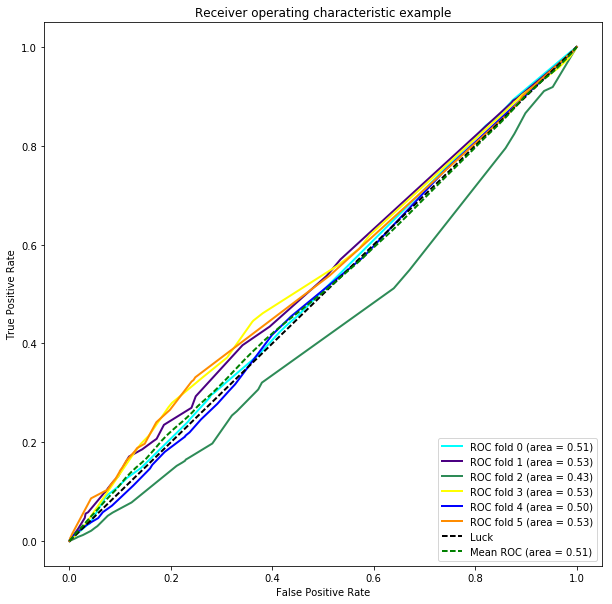

In [24]:
# Decision Tree
#X, y = feature_V1.drop(['Speaker','label','vowel'],axis=1), feature_V1['label']
X, y = feature_V1.drop(['Speaker','label','vowel','word','pre_seg','fol_seg'],axis=1), feature_V1['label']


cv = StratifiedKFold(n_splits=6)
classifier = tree.DecisionTreeClassifier(max_depth=5)#, min_samples_leaf=300)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
plt.figure(figsize = (10,10))
for (train, test), color in zip(cv.split(speaker,label_speaker), colors):
    train_s = speaker[train]
    test_s = speaker[test]
    
    probas_ = classifier.fit(X.ix[train_s], y.ix[train_s]).predict_proba(X.ix[test_s])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.ix[test_s], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(speaker,label_speaker)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
#plt.savefig(data_path+'/ctree_10.png')

In [ ]:
probas_

In [101]:
# Test performance by Speaker


# Random Forest

In [104]:
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)


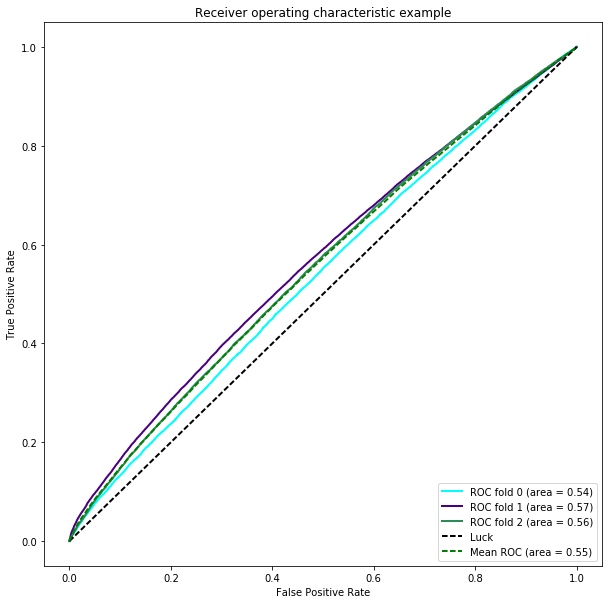

In [178]:
X, y = feature_V1.drop(['Speaker','label','vowel'],axis=1), feature_V1['label']

cv = StratifiedKFold(n_splits=3)
classifier = RandomForestClassifier(max_depth=20, n_estimators=50)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
plt.figure(figsize = (10,10))
for (train, test), color in zip(cv.split(speaker,label_speaker), colors):
    train_s = speaker[train]
    test_s = speaker[test]
    
    probas_ = classifier.fit(X.ix[train_s], y.ix[train_s]).predict_proba(X.ix[test_s])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.ix[test_s], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(speaker,label_speaker)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# GradientBoosting

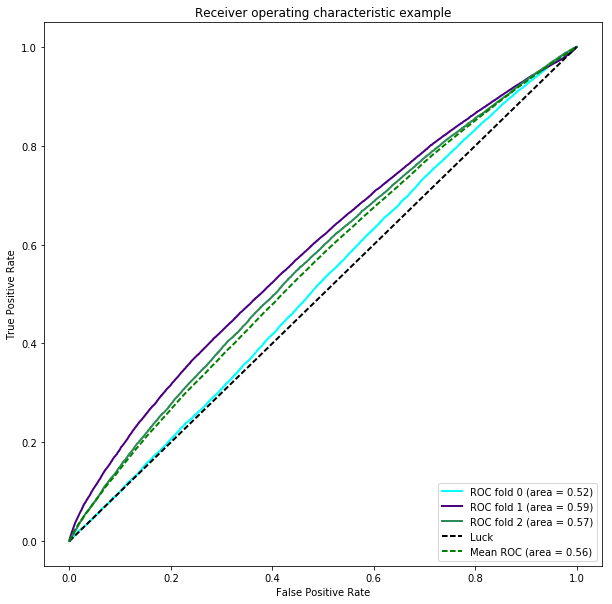

In [106]:
X, y = feature_V1.drop(['Speaker','label','vowel'],axis=1), feature_V1['label']

cv = StratifiedKFold(n_splits=3)
classifier = GradientBoostingClassifier(n_estimators=50)
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
plt.figure(figsize = (10,10))
for (train, test), color in zip(cv.split(speaker,label_speaker), colors):
    train_s = speaker[train]
    test_s = speaker[test]
    
    probas_ = classifier.fit(X.ix[train_s], y.ix[train_s]).predict_proba(X.ix[test_s])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.ix[test_s], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color,
             label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',
         label='Luck')

mean_tpr /= cv.get_n_splits(speaker,label_speaker)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()